In [1]:
import numpy as np
from scipy.stats import exponnorm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.optimize import minimize
from scipy.stats import skewnorm

In [3]:
data = np.load('1d_scan10k1.npy')

In [2]:
data = np.load('time_delay_2d_np5.np.npy')

In [3]:
def find_tot_counts(pdata):
    tc = 0
    for i in pdata:
        tc+=i
    return tc

def gaussian(A, x, mean, std):
    return A * (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean)**2) / (2 * std**2))

def emg(A, x, mean, std, decay):
    # Ensure decay is positive to prevent issues in fitting
    # decay = np.abs(decay)
    return A * (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
            erfc((mean + decay * std**2 - x) / (np.sqrt(2) * std))

def hist_gaus_fit(pdata):
    # Calculate total counts as the sum of `pdata`
    A = np.sum(pdata)  # Assuming `A` is the total area under the curve
    nbins = pdata.shape[0]
    # Define the Gaussian function with A as a constant
    def gaussian(x, mean, std):
        return A * (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean)**2) / (2 * std**2))

    # Create the x-values based on the bin width and number of bins
    x = np.linspace(0.5, nbins-0.5, nbins)
    y = pdata  # y-values from the data

    # Calculate weighted mean and standard deviation for the initial guess
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))

    print(mean_weighted)
    print(std_weighted)

    initial_guess = [mean_weighted, std_weighted]

    # Fit the Gaussian model to the data
    popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)

    # Plot the fitted curve and the data
    plt.plot(x, gaussian(x, *popt), label="Gaussian Fit", color="red")
    plt.plot(x, pdata, label="Data", color="blue", linewidth = 0.5)
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

    # Return optimized parameters: mean and std
    return popt

def gaussian_fit_est(pdata):
    A = np.sum(pdata)  # Assuming `A` is the total area under the curve
    nbins = pdata.shape[0]
    # Define the Gaussian function with A as a constant
    def gaussian(x, mean, std):
        return A * (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean)**2) / (2 * std**2))

    # Create the x-values based on the bin width and number of bins
    x = np.linspace(0.5, nbins-0.5, nbins)
    y = pdata  # y-values from the data

    # Calculate weighted mean and standard deviation for the initial guess
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))

    print(mean_weighted)
    print(std_weighted)

    initial_guess = [mean_weighted, std_weighted]

    # Fit the Gaussian model to the data
    popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)

    return popt

def hist_emg_fit(pdata):
    # Calculate total counts as the sum of `pdata`
    A = np.sum(pdata)  # Assuming `A` is the total area under the curve
    nbins = pdata.shape[0]
    # Define the EMG function with A as a constant
    def emg(x, mean, std, decay):
        # Ensure decay is positive to prevent issues in fitting
        decay = np.abs(decay)
        return A * (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
               erfc((mean + decay * std**2 - x) / (np.sqrt(2) * std))

    # Create the x-values based on the bin width and number of bins
    x = np.linspace(0.5, nbins-0.5, nbins)
    y = pdata  # y-values from the data

    # Calculate weighted mean and standard deviation for the initial guess
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))

    # Initial guess for decay rate (lambda); set a small positive value initially
    decay_initial = 1 / (np.max(x) - np.min(x))

    # Set initial guess as [mean, std, decay]
    initial_guess = [mean_weighted, std_weighted, decay_initial]

    # Fit the EMG model to the data
    popt, pcov = curve_fit(emg, x, y, p0=initial_guess)

    # Plot the fitted curve and the data
    plt.plot(x, emg(x, *popt), label="EMG Fit", color="red")
    plt.scatter(x, pdata, label="Data", color="blue")
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

    # Return optimized parameters: mean, std, and decay
    return popt

def emg_fit_est(pdata):
    # Calculate total counts as the sum of `pdata`
    A = np.sum(pdata)  # Assuming `A` is the total area under the curve
    nbins = pdata.shape[0]
    # Define the EMG function with A as a constant
    def emg(x, mean, std, decay):
        # Ensure decay is positive to prevent issues in fitting
        decay = np.abs(decay)
        return A * (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
               erfc((mean + decay * std**2 - x) / (np.sqrt(2) * std))

    # Create the x-values based on the bin width and number of bins
    x = np.linspace(0.5, nbins-0.5, nbins)
    y = pdata  # y-values from the data

    # Calculate weighted mean and standard deviation for the initial guess
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))

    # Initial guess for decay rate (lambda); set a small positive value initially
    decay_initial = 1 / (np.max(x) - np.min(x))

    # Set initial guess as [mean, std, decay]
    initial_guess = [mean_weighted, std_weighted, decay_initial]

    # Fit the EMG model to the data
    popt, pcov = curve_fit(emg, x, y, p0=initial_guess)

    # Return optimized parameters: mean, std, and decay
    return popt

In [4]:
def emg_mle_plot(pdata):
    def emg_pdf(x, mean, std, decay):
        """Exponentially modified Gaussian PDF."""
        decay = np.abs(decay)  # Ensure decay is positive
        return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
            erfc((mean + decay * std**2 - x) / (np.sqrt(2) * std))

    def negative_log_likelihood(params, x, y):
        """Negative log-likelihood for the EMG function given histogram data."""
        mean, std, decay = params
        # Calculate predicted probabilities for each bin using the EMG PDF
        pdf_vals = emg_pdf(x, mean, std, decay)
        pdf_vals = np.clip(pdf_vals, 1e-10, None)  # Avoid log(0) by setting a minimum threshold
        # Weighted negative log likelihood
        nll = -np.sum(y * np.log(pdf_vals))
        return nll

    def mle_emg_fit(pdata):
        # Data setup
        nbins = pdata.shape[0]
        x = np.linspace(0.5, nbins - 0.5, nbins)
        y = pdata  # y-values from the data

        # Initial guesses for mean, std, and decay
        mean_weighted = np.sum(x * pdata) / np.sum(pdata)
        std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))
        decay_initial = 1 / (np.max(x) - np.min(x))
        initial_guess = [mean_weighted, std_weighted, decay_initial]

        # Perform MLE by minimizing the negative log-likelihood
        result = minimize(negative_log_likelihood, initial_guess, args=(x, y), method="L-BFGS-B",
                        bounds=[(None, None), (1e-5, None), (1e-5, None)])  # Bounds to keep std and decay positive

        # Extract optimized parameters
        mean_mle, std_mle, decay_mle = result.x

        # Plot the fitted EMG and the data
        plt.plot(x, emg_pdf(x, mean_mle, std_mle, decay_mle) * np.sum(y), label="EMG MLE Fit", color="red")
        plt.scatter(x, pdata, label="Data", color="blue")
        plt.xlabel("Bins")
        plt.ylabel("Counts")
        plt.legend()
        plt.show()

        # Return optimized parameters: mean, std, and decay
        return mean_mle, std_mle, decay_mle
    
    return mle_emg_fit(pdata)

In [18]:
# Negative log-likelihood function for MLE with clamping
def neg_log_likelihood(params, model_func, x_data, y_data):
    y_fit = model_func(x_data, *params)
    y_fit = np.clip(y_fit, 1e-10, None)  # Clamp to avoid log(0) issues
    return -np.sum(y_data * np.log(y_fit) - y_fit)


# Initialize arrays to store AIC, BIC, and LSE for each model at each (Y, X) position
shape_y, shape_x, time_bins = data.shape
aic_values = np.zeros((shape_y, shape_x, 4))  # 4 models
bic_values = np.zeros((shape_y, shape_x, 4))
lse_values = np.zeros((shape_y, shape_x, 4))
y_fits = np.zeros((shape_y, shape_x, time_bins))  # Store y_fit for the best model

# Loop through each (Y, X) position and fit all models
for y in range(shape_y):
    for x in range(shape_x):
        y_data = data[y, x, :]
        x_data = np.arange(len(y_data))

        # Fit each model and calculate metrics
        for model_index, (model_func, initial_guess, bounds, num_params) in enumerate([
            (gaussian, [np.max(y_data), np.mean(x_data), np.std(x_data)],
             [(1e-5, np.max(y_data) * 2), (-100, 100), (1, 100)], 3),
#             (gaussian_plus_expo, [np.max(y_data), np.mean(x_data), np.std(x_data), np.max(y_data) / 2, 10],
#              [(1e-5, np.max(y_data) * 2), (-100, 100), (1, 100), (1e-5, np.max(y_data)), (1, 200)], 5),
#             (gauss_convolved_expo, [[250, 50, max(y_data), 100, max(y_data) / 2, 200]
# ],
#              [(1e-5, 1e2), (1, 100), (1e-5, np.max(y_data) * 2), (1, 200), (1e-5, np.max(y_data)), (1, 300)], 6)

        ]):
            try:
                # Perform MLE with bounds
                result = minimize(neg_log_likelihood, initial_guess, args=(x_data, y_data),
                                  method='L-BFGS-B', bounds=[(0, time_bins), (1, time_bins),
                                                             (1e-3, None), (1e-3, None),
                                                             (1e-3, None), (1e-3, None)])
                if result.success:
                    popt = result.x  # Optimal parameters
                    y_fit = model_func(x_data, *popt)  # Calculate y_fit with optimal parameters

                    # Calculate LSE, AIC, and BIC
                    residuals = y_data - y_fit
                    rss = np.sum(residuals ** 2)
                    n = len(y_data)
                    aic = n * np.log(rss / n) + 2 * num_params
                    bic = n * np.log(rss / n) + num_params * np.log(n)

                    # Store metrics
                    lse_values[y, x, model_index] = rss
                    aic_values[y, x, model_index] = aic
                    bic_values[y, x, model_index] = bic

                    # Save y_fit if this is the best model
                    if model_index == np.argmin(aic_values[y, x]):
                        y_fits[y, x, :] = y_fit  # Store y_fit of the best model

            except RuntimeError as e:
                print(f"Fitting failed at (Y={y}, X={x}): {e}")
                lse_values[y, x, model_index] = np.nan
                aic_values[y, x, model_index] = np.nan
                bic_values[y, x, model_index] = np.nan

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (6,)  and requested shape (3,)

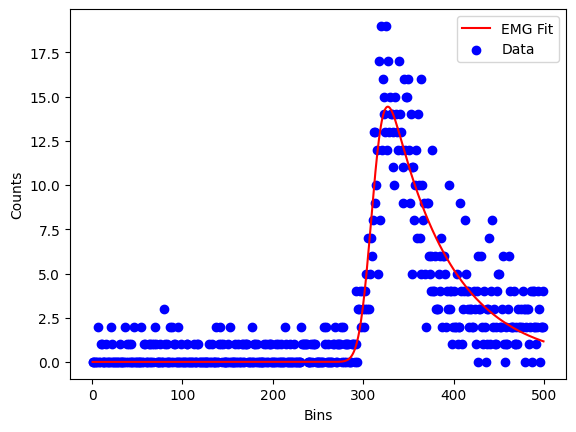

array([3.10166469e+02, 1.09640861e+01, 1.51196667e-02])

In [14]:
hist_emg_fit(data[0,4])


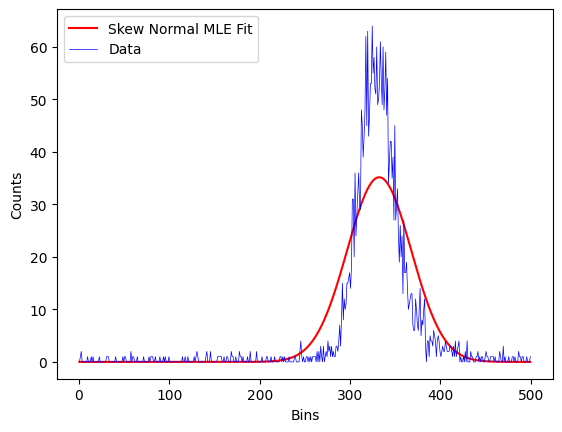

(329.1005486067167, 35.48511289913285, 0.11010208022631901)

In [17]:
skewnorm_mle_plot(data[0,-1])

C:\Users\namra\AppData\Local\Temp\ipykernel_37760\992764415.py:5: RuntimeWarning: overflow encountered in exp
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
C:\Users\namra\AppData\Local\Temp\ipykernel_37760\992764415.py:5: RuntimeWarning: invalid value encountered in multiply
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \


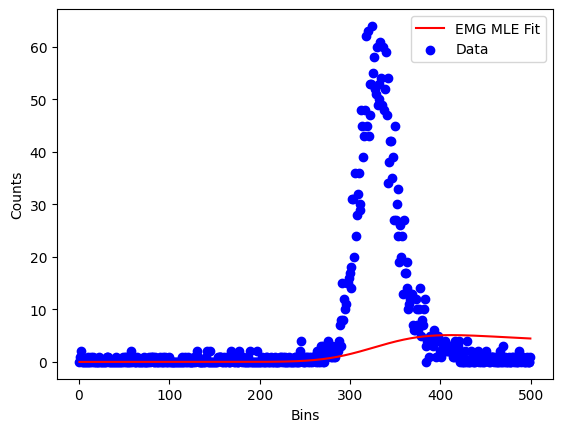

(329.5455566249599, 44.55378718116513, 0.002004008016032064)

In [16]:
emg_mle_plot(data[0, -1])

In [5]:
def skewnormp(A, x, loc, scale, shape):
        """Skew Normal PDF using SciPy's skewnorm."""
        return A * skewnorm.pdf(x, shape, loc=loc, scale=scale)

def skewnorm_mle_plot(pdata):
    def skewnorm_pdf(x, loc, scale, shape):
        """Skew Normal PDF using SciPy's skewnorm."""
        return skewnorm.pdf(x, shape, loc=loc, scale=scale)

    def negative_log_likelihood(params, x, y):
        """Negative log-likelihood for the skew normal given histogram data."""
        loc, scale, shape = params
        # Calculate predicted probabilities for each bin using the skew normal PDF
        pdf_vals = skewnorm_pdf(x, loc, scale, shape)
        pdf_vals = np.clip(pdf_vals, 1e-10, None)  # Avoid log(0) by setting a minimum threshold
        # Weighted negative log likelihood
        nll = -np.sum(y * np.log(pdf_vals))
        return nll

    def mle_skewnorm_fit(pdata):
        # Data setup
        nbins = pdata.shape[0]
        x = np.linspace(0.5, nbins - 0.5, nbins)
        y = pdata  # y-values from the data

        # Initial guesses for location, scale, and shape (skewness)
        loc_initial = np.sum(x * pdata) / np.sum(pdata)  # Mean estimate
        scale_initial = np.sqrt(np.sum(pdata * (x - loc_initial)**2) / np.sum(pdata))  # Std dev estimate
        shape_initial = 0.0  # Start with no skewness
        initial_guess = [loc_initial, scale_initial, shape_initial]

        # Perform MLE by minimizing the negative log-likelihood
        result = minimize(negative_log_likelihood, initial_guess, args=(x, y), method="L-BFGS-B",
                          bounds=[(None, None), (1e-5, None), (None, None)])  # Bounds to keep scale positive

        # Extract optimized parameters
        loc_mle, scale_mle, shape_mle = result.x

        # Plot the fitted skew normal distribution and the data
        plt.plot(x, skewnorm_pdf(x, loc_mle, scale_mle, shape_mle) * np.sum(y), label="Skew Normal MLE Fit", color="red")
        plt.plot(x, pdata, label="Data", color="blue", linewidth=0.5)
        plt.xlabel("Bins")
        plt.ylabel("Counts")
        plt.legend()
        plt.show()

        # Return optimized parameters: loc, scale, and shape
        return loc_mle, scale_mle, shape_mle
    
    return mle_skewnorm_fit(pdata)

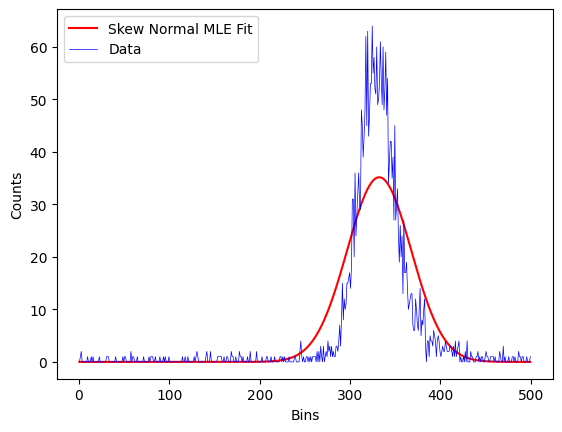

In [7]:
something = skewnorm_mle_plot(data[0, -1])

In [8]:
print(something)

(179.10932017380827, 20.986165740657295, 0.02400256346750118)


In [8]:
def emg_pdf(x, mean, std, decay):
    """Exponentially modified Gaussian PDF."""
    # decay = np.abs(decay)  # Ensure decay is positive
    return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
        erfc((mean + decay * std**2 - x) / (np.sqrt(2) * std))

def negative_log_likelihood_emg(params, x, y):
    """Negative log-likelihood for the EMG function given histogram data."""
    mean, std, decay = params
    # Calculate predicted probabilities for each bin using the EMG PDF
    pdf_vals = emg_pdf(x, mean, std, decay)
    pdf_vals = np.clip(pdf_vals, 1e-10, None)  # Avoid log(0) by setting a minimum threshold
    # Weighted negative log likelihood
    nll = -np.sum(y * np.log(pdf_vals))
    return nll

def mle_emg_fit(pdata):
    # Data setup
    nbins = pdata.shape[0]
    x = np.linspace(0.5, nbins - 0.5, nbins)
    y = pdata  # y-values from the data

    # Initial guesses for mean, std, and decay
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))
    decay_initial = 1 / (np.max(x) - np.min(x))
    initial_guess = [mean_weighted, std_weighted, decay_initial]

    # Perform MLE by minimizing the negative log-likelihood
    result = minimize(negative_log_likelihood_emg, initial_guess, args=(x, y), method="L-BFGS-B",
                    bounds=[(None, None), (1e-5, None), (1e-5, None)])  # Bounds to keep std and decay positive

    # Extract optimized parameters
    mean_mle, std_mle, decay_mle = result.x

    # Plot the fitted EMG and the data
    plt.plot(x, emg_pdf(x, mean_mle, std_mle, decay_mle) * np.sum(y), label="EMG MLE Fit", color="red")
    plt.scatter(x, pdata, label="Data", color="blue")
    plt.xlabel("Bins")
    plt.ylabel("Counts")
    plt.legend()
    plt.show()

    # Return optimized parameters: mean, std, and decay
    return mean_mle, std_mle, decay_mle

def skewnorm_pdf(x, loc, scale, shape):
        """Skew Normal PDF using SciPy's skewnorm."""
        return skewnorm.pdf(x, shape, loc=loc, scale=scale)

def negative_log_likelihood_sn(params, x, y):
    """Negative log-likelihood for the skew normal given histogram data."""
    loc, scale, shape = params
    # Calculate predicted probabilities for each bin using the skew normal PDF
    pdf_vals = skewnorm_pdf(x, loc, scale, shape)
    pdf_vals = np.clip(pdf_vals, 1e-10, None)  # Avoid log(0) by setting a minimum threshold
    # Weighted negative log likelihood
    nll = -np.sum(y * np.log(pdf_vals))
    return nll

def skewnorm_mle(pdata):
    # Data setup
    nbins = pdata.shape[0]
    x = np.linspace(0.5, nbins - 0.5, nbins)
    y = pdata  # y-values from the data

    # Initial guesses for location, scale, and shape (skewness)
    loc_initial = np.sum(x * pdata) / np.sum(pdata)  # Mean estimate
    scale_initial = np.sqrt(np.sum(pdata * (x - loc_initial)**2) / np.sum(pdata))  # Std dev estimate
    shape_initial = 0.0  # Start with no skewness
    initial_guess = [loc_initial, scale_initial, shape_initial]

    # Perform MLE by minimizing the negative log-likelihood
    result = minimize(negative_log_likelihood_sn, initial_guess, args=(x, y), method="L-BFGS-B",
                        bounds=[(None, None), (1e-5, None), (None, None)])  # Bounds to keep scale positive

    # Extract optimized parameters
    loc_mle, scale_mle, shape_mle = result.x

    # Plot the fitted skew normal distribution and the data
    # plt.plot(x, skewnorm_pdf(x, loc_mle, scale_mle, shape_mle) * np.sum(y), label="Skew Normal MLE Fit", color="red")
    # plt.plot(x, pdata, label="Data", color="blue", linewidth=0.5)
    # plt.xlabel("Bins")
    # plt.ylabel("Counts")
    # plt.legend()
    # plt.show()

    # Return optimized parameters: loc, scale, and shape
    return loc_mle, scale_mle, shape_mle

def emg_mle(pdata):
    nbins = pdata.shape[0]
    x = np.linspace(0.5, nbins - 0.5, nbins)
    y = pdata  # y-values from the data

    # Initial guesses for mean, std, and decay
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))
    decay_initial = 1 / (np.max(x) - np.min(x))
    initial_guess = [mean_weighted, std_weighted, decay_initial]

    # Perform MLE by minimizing the negative log-likelihood
    result = minimize(negative_log_likelihood_emg, initial_guess, args=(x, y), method="L-BFGS-B",
                    bounds=[(None, None), (1e-5, None), (1e-5, None)])  # Bounds to keep std and decay positive

    # Extract optimized parameters
    mean_mle, std_mle, decay_mle = result.x
    return mean_mle, std_mle, decay_mle

def gaussian_mle(pdata):
    nbins = pdata.shape[0]
    x = np.linspace(0.5, nbins - 0.5, nbins)
    y = pdata  # y-values from the data

    # Initial guesses for mean, std, and decay
    mean_weighted = np.sum(x * pdata) / np.sum(pdata)
    std_weighted = np.sqrt(np.sum(pdata * (x - mean_weighted)**2) / np.sum(pdata))
    return mean_weighted, std_weighted

C:\Users\namra\AppData\Local\Temp\ipykernel_37760\2778574197.py:4: RuntimeWarning: overflow encountered in exp
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
C:\Users\namra\AppData\Local\Temp\ipykernel_37760\2778574197.py:4: RuntimeWarning: invalid value encountered in multiply
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \


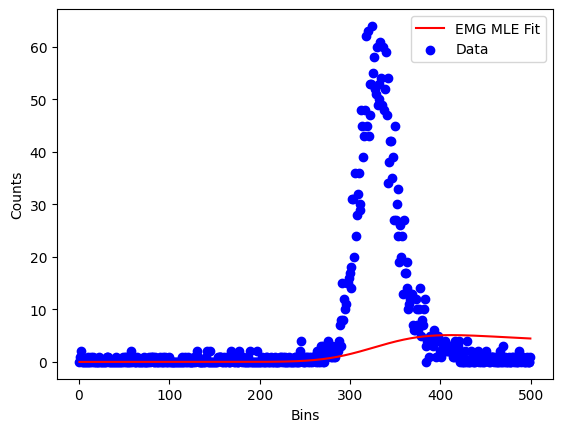

(329.5455566249599, 44.55378718116513, 0.002004008016032064)

In [9]:
mle_emg_fit(data[0, -1])

C:\Users\namra\AppData\Local\Temp\ipykernel_37760\2778574197.py:4: RuntimeWarning: overflow encountered in exp
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \
C:\Users\namra\AppData\Local\Temp\ipykernel_37760\2778574197.py:4: RuntimeWarning: invalid value encountered in multiply
  return (decay / 2) * np.exp((decay / 2) * (2 * mean + decay * std**2 - 2 * x)) * \


328.7063137755102
47.40554355374522


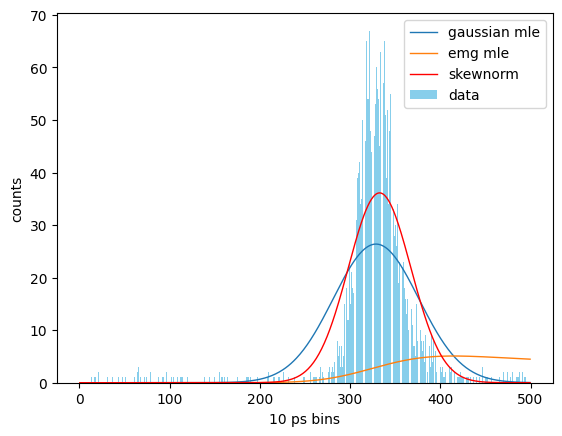

In [10]:
sdata = data[0, -4]
nbins = 500
A = np.sum(sdata)
gmean, gstd = gaussian_mle(sdata)
emean, estd, edec = emg_mle(sdata)
gfmean, gfstd = gaussian_fit_est(sdata)
efmean, efstd, efdec = emg_fit_est(sdata)
smean, sstd, sdec = skewnorm_mle(sdata)
x = np.linspace(0.5, nbins - 0.5, nbins)
plt.plot(x, gaussian(A, x, gmean, gstd), label = 'gaussian mle', linewidth=1)
plt.plot(x, emg(A, x, emean, estd, edec), label = 'emg mle', linewidth=1)
# plt.plot(x, gaussian(A, x, gfmean, gfstd), label = 'gaussian fit', linewidth=1)
# plt.plot(x, emg(A, x, efmean, efstd, efdec), label = 'emg fit', linewidth=1)
plt.plot(x, skewnormp(A, x, smean, sstd, sdec), label='skewnorm', linewidth=1, color='red')
plt.bar(x-0.5, sdata, label='data', align='edge', color='skyblue')
plt.xlabel('10 ps bins')
plt.ylabel('counts')
plt.legend()
plt.show()